<a href="https://colab.research.google.com/github/axshay007/Stage_E_assignment_sol/blob/main/HAMOYE_STAGE_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
dataframe = pd.read_csv('/content/Time_series_analysis_and_forecast_DATASET.csv')

In [54]:
dataframe.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [55]:
Dataset=dataframe.iloc[:,[0,4]]
Dataset

,FullDate,ElecPrice
0,2010-09-01 00:00:00,23.710
1,2010-09-01 01:00:00,22.635
2,2010-09-01 02:00:00,22.565
3,2010-09-01 03:00:00,18.910
4,2010-09-01 04:00:00,18.030
...,...,...
92011,2021-02-28 19:00:00,117.925
92012,2021-02-28 20:00:00,87.880
92013,2021-02-28 21:00:00,62.060
92014,2021-02-28 22:00:00,62.000


In [56]:
Dataset.iloc[0:20866,:]

,FullDate,ElecPrice
0,2010-09-01 00:00:00,23.710
1,2010-09-01 01:00:00,22.635
2,2010-09-01 02:00:00,22.565
3,2010-09-01 03:00:00,18.910
4,2010-09-01 04:00:00,18.030
...,...,...
20861,2013-01-17 05:00:00,45.140
20862,2013-01-17 06:00:00,44.595
20863,2013-01-17 07:00:00,45.540
20864,2013-01-17 08:00:00,47.515


In [57]:
Dataset.rename(columns = {'FullDate':'ds'}, inplace = True)
Dataset.rename(columns = {'ElecPrice':'y'}, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [58]:
Dataset.iloc[0:20866,:]

,ds,y
0,2010-09-01 00:00:00,23.710
1,2010-09-01 01:00:00,22.635
2,2010-09-01 02:00:00,22.565
3,2010-09-01 03:00:00,18.910
4,2010-09-01 04:00:00,18.030
...,...,...
20861,2013-01-17 05:00:00,45.140
20862,2013-01-17 06:00:00,44.595
20863,2013-01-17 07:00:00,45.540
20864,2013-01-17 08:00:00,47.515


In [59]:
dt=Dataset['ds'].str[:11]

In [60]:
data=pd.DataFrame(dt)
data

,ds
0,2010-09-01
1,2010-09-01
2,2010-09-01
3,2010-09-01
4,2010-09-01
...,...
92011,2021-02-28
92012,2021-02-28
92013,2021-02-28
92014,2021-02-28


In [61]:
Dataset['ds']=data['ds'].values

<ipython-input-61-bff16abeae33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset['ds']=data['ds'].values


In [62]:
Dataset['ds']

0        2010-09-01 
1        2010-09-01 
2        2010-09-01 
3        2010-09-01 
4        2010-09-01 
            ...     
92011    2021-02-28 
92012    2021-02-28 
92013    2021-02-28 
92014    2021-02-28 
92015    2021-02-28 
Name: ds, Length: 92016, dtype: object

In [63]:
Dataset

,ds,y
0,2010-09-01,23.710
1,2010-09-01,22.635
2,2010-09-01,22.565
3,2010-09-01,18.910
4,2010-09-01,18.030
...,...,...
92011,2021-02-28,117.925
92012,2021-02-28,87.880
92013,2021-02-28,62.060
92014,2021-02-28,62.000


In [64]:
dataset1=Dataset.iloc[0:20866,:]

In [65]:
dataset1

,ds,y
0,2010-09-01,23.710
1,2010-09-01,22.635
2,2010-09-01,22.565
3,2010-09-01,18.910
4,2010-09-01,18.030
...,...,...
20861,2013-01-17,45.140
20862,2013-01-17,44.595
20863,2013-01-17,45.540
20864,2013-01-17,47.515


In [66]:
dataset1.max()

ds    2013-01-17 
y       12199.115
dtype: object

In [67]:

from datetime import datetime
dataset1['ds'] = pd.to_datetime(dataset1.ds)

dataset1.set_index('ds', inplace = True)

<ipython-input-67-da7c2230189f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1['ds'] = pd.to_datetime(dataset1.ds)


In [68]:
datafrequency_daily = dataset1.resample('D').sum()

In [69]:
datafrequency_daily

,y
ds,
2010-09-01,2751.700
2010-09-02,570.810
2010-09-03,504.975
2010-09-04,502.275
2010-09-05,500.555
...,...
2013-01-13,1109.600
2013-01-14,1095.950
2013-01-15,1172.775


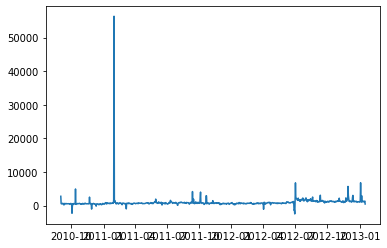

In [70]:
plt.plot(datafrequency_daily.index,datafrequency_daily.y)

In [71]:
display(dataset1.iloc[2757])

y    24.87
Name: 2010-12-24 00:00:00, dtype: float64

In [78]:
train_dataa=dataset1.iloc[18109:20866,:]
testdata=dataset1.iloc[2757:,:]

In [79]:
testdata.shape

(18109, 1)

In [80]:
testdata.tail()

,y
ds,
2013-01-17,45.140
2013-01-17,44.595
2013-01-17,45.540
2013-01-17,47.515
2013-01-17,50.870


In [81]:
train_dataa.shape

(2757, 1)

In [83]:
train_dataa

,y
ds,
2012-09-24,58.085
2012-09-24,59.820
2012-09-24,60.165
2012-09-24,56.290
2012-09-24,56.585
...,...
2013-01-17,45.140
2013-01-17,44.595
2013-01-17,45.540


In [85]:

from prophet import Prophet
model = Prophet()

model.fit(Dataset)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkltj_xzh/xw7zxzdy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkltj_xzh/fi6tqe0v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4158', 'data', 'file=/tmp/tmpkltj_xzh/xw7zxzdy.json', 'init=/tmp/tmpkltj_xzh/fi6tqe0v.json', 'output', 'file=/tmp/tmpkltj_xzh/prophet_modelu5qny6ja/prophet_model-20230131194014.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:40:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:40:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [86]:
future = model.make_future_dataframe(periods=20, freq='D') 

In [87]:

future.shape
future

,ds
0,2010-09-01
1,2010-09-02
2,2010-09-03
3,2010-09-04
4,2010-09-05
...,...
3849,2021-03-16
3850,2021-03-17
3851,2021-03-18
3852,2021-03-19


In [88]:
forecast = model.predict(future)

In [89]:
forecast.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3844,2021-03-11,4.025306,-269.568956,264.362677,4.025306,4.025306,10.264741,10.264741,10.264741,15.634235,15.634235,15.634235,-5.369494,-5.369494,-5.369494,0.0,0.0,0.0,14.290047
3845,2021-03-12,3.871575,-264.835880,284.593609,3.871575,3.871575,-3.262552,-3.262552,-3.262552,2.619466,2.619466,2.619466,-5.882018,-5.882018,-5.882018,0.0,0.0,0.0,0.609024
3846,2021-03-13,3.717845,-277.783466,258.793908,3.717845,3.717845,-18.904616,-18.904616,-18.904616,-12.448995,-12.448995,-12.448995,-6.455622,-6.455622,-6.455622,0.0,0.0,0.0,-15.186772
3847,2021-03-14,3.564114,-275.518622,255.004061,3.564114,3.564114,-22.199874,-22.199874,-22.199874,-15.118980,-15.118980,-15.118980,-7.080894,-7.080894,-7.080894,0.0,0.0,0.0,-18.635760
3848,2021-03-15,3.410384,-248.241539,262.811066,3.410384,3.410384,-3.099369,-3.099369,-3.099369,4.647147,4.647147,4.647147,-7.746517,-7.746517,-7.746517,0.0,0.0,0.0,0.311015
3849,2021-03-16,3.256653,-277.033105,275.996035,3.256653,3.256653,-8.515715,-8.515715,-8.515715,-0.076095,-0.076095,-0.076095,-8.439619,-8.439619,-8.439619,0.0,0.0,0.0,-5.259061
3850,2021-03-17,3.102923,-279.534404,247.063183,3.102923,3.102923,-4.402958,-4.402958,-4.402958,4.743221,4.743221,4.743221,-9.146179,-9.146179,-9.146179,0.0,0.0,0.0,-1.300035
3851,2021-03-18,2.949192,-262.884814,287.949935,2.949192,2.949192,5.782805,5.782805,5.782805,15.634235,15.634235,15.634235,-9.851430,-9.851430,-9.851430,0.0,0.0,0.0,8.731997
3852,2021-03-19,2.795462,-281.662150,260.297759,2.795462,2.795462,-7.920822,-7.920822,-7.920822,2.619466,2.619466,2.619466,-10.540288,-10.540288,-10.540288,0.0,0.0,0.0,-5.125360
3853,2021-03-20,2.641731,-278.794746,255.143695,2.641731,2.641731,-23.646768,-23.646768,-23.646768,-12.448995,-12.448995,-12.448995,-11.197773,-11.197773,-11.197773,0.0,0.0,0.0,-21.005036


In [91]:
forecast[['ds' , 'yhat_upper','yhat_lower','yhat', 'trend', 'trend_lower', 'trend_upper']]


,ds,yhat_upper,yhat_lower,yhat,trend,trend_lower,trend_upper
0,2010-09-01,304.224929,-228.329073,35.425997,31.996020,31.996020,31.996020
1,2010-09-02,311.041325,-238.115198,45.572127,32.031845,32.031845,32.031845
2,2010-09-03,301.716491,-240.539254,31.720008,32.067671,32.067671,32.067671
3,2010-09-04,283.597630,-245.472074,15.740828,32.103496,32.103496,32.103496
4,2010-09-05,279.667696,-256.411403,12.106887,32.139321,32.139321,32.139321
...,...,...,...,...,...,...,...
3849,2021-03-16,275.996035,-277.033105,-5.259061,3.256653,3.256653,3.256653
3850,2021-03-17,247.063183,-279.534404,-1.300035,3.102923,3.102923,3.102923
3851,2021-03-18,287.949935,-262.884814,8.731997,2.949192,2.949192,2.949192
3852,2021-03-19,260.297759,-281.662150,-5.125360,2.795462,2.795462,2.795462


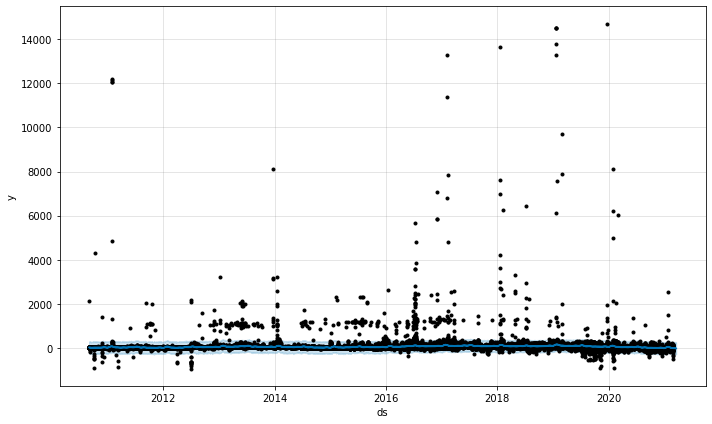

In [92]:

model.plot(forecast)
plt.show()

In [105]:

import numpy as np

def mape(actua, predi): 
    actua, pred = np.array(actua), np.array(predi)
    return np.mean(np.abs((actua - predi) / actua)) * 100

In [106]:

type(actua)

pandas.core.series.Series

In [107]:
actua = testdata['y']      
predi = forecast['yhat']
mape(actua, predi)

ValueError: ignored

In [102]:

forecast['yhat'].shape

(3854,)

(3854,)

In [104]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(testdata['y'] ,forecast['yhat']))
a=rmse
print(rmse)

ValueError: ignored